In [1]:
import numpy as np
from keras.layers import Input, Conv2D, Activation, BatchNormalization
from keras.models import Model
from keras.datasets import mnist

In [2]:
class MaskedConv2D(Conv2D):
  def __init__(self, mask_type, *args, **kwargs):
    super(MaskedConv2D, self).__init__(*args, **kwargs)
    self.mask_type = mask_type
    assert mask_type in {'A', 'B'}, "mask_type must be 'A' or 'B'."
  def build(self, input_shape):
    super(MaskedConv2D, self).build(input_shape)
    self.mask = np.ones(self.kernel.shape.as_list())
    self.mask[self.kernel_size[0] // 2, self.kernel_size[1] // 2 +
    (self.mask_type == 'B'):, :, :] = 0.
    self.mask[self.kernel_size[0] // 2 + 1:, :, :, :] = 0.
  def call(self, inputs):
    self.kernel.assign(self.kernel * self.mask)
    return super(MaskedConv2D, self).call(inputs)

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))


In [5]:
inputs = Input(shape=(28, 28, 1))
x = MaskedConv2D('A', 64, 7, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
for _ in range(5): # Add more layers
  x = MaskedConv2D('B', 64, 7, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

x = MaskedConv2D('B', 1, 7, padding='same')(x)
model = Model(inputs=inputs, outputs=x)


In [6]:
model.compile(optimizer='adam', loss='mse') # Use MSE loss
model.fit(x_train, x_train, epochs=5, batch_size=128) # Train for more epochs

Epoch 1/5
469/469 [==============================] - 66s 112ms/step - loss: 0.0505
Epoch 2/5
469/469 [==============================] - 52s 111ms/step - loss: 0.0073
Epoch 3/5
469/469 [==============================] - 53s 114ms/step - loss: 0.0063
Epoch 4/5
469/469 [==============================] - 54s 115ms/step - loss: 0.0061
Epoch 5/5
469/469 [==============================] - 54s 115ms/step - loss: 0.0058


1/1 [==============================] - 0s 496ms/step


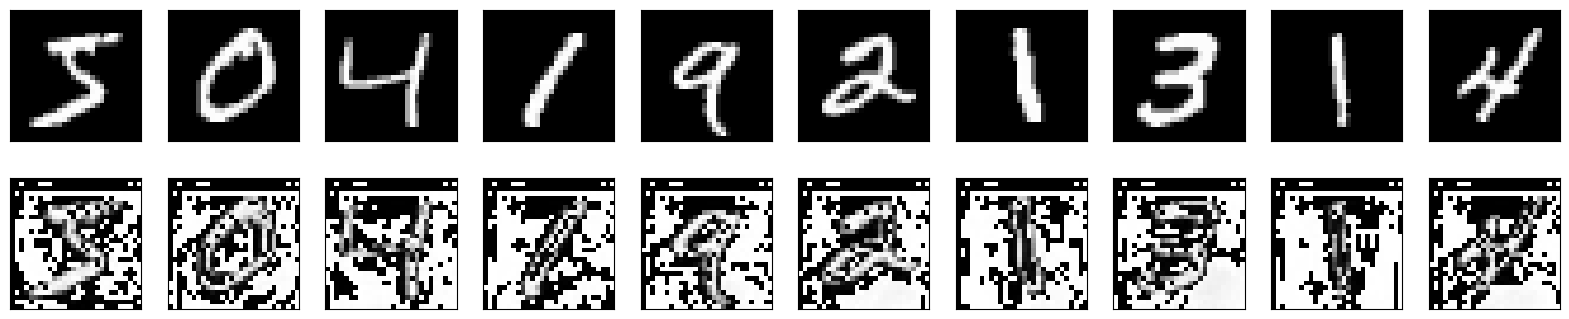

In [7]:
import matplotlib.pyplot as plt
# Generate images
n = 10 # Number of images to display
generated_images = model.predict(x_train[:n])
# Reshape and re-scale the images
generated_images = generated_images.reshape((n, 28, 28))
generated_images = (generated_images * 255).astype(np.uint8)
# Plot the images
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(generated_images[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


In [10]:
inputs = Input(shape=(28, 28, 1))
x = MaskedConv2D('A', 64, 7, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
for _ in range(5): # Add more layers
  x = MaskedConv2D('B', 64, 7, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

  # New layers added inside the loop
  x = MaskedConv2D('B', 64, 7, padding='same')(x)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)

x = MaskedConv2D('B', 1, 7, padding='same')(x)
model = Model(inputs=inputs, outputs=x)

In [11]:
model.compile(optimizer='adam', loss='mse') # Use MSE loss
model.fit(x_train, x_train, epochs=15, batch_size=128) # Training for 15 epochs

Epoch 1/15
469/469 [==============================] - 106s 211ms/step - loss: 0.0720
Epoch 2/15
469/469 [==============================] - 102s 218ms/step - loss: 0.0448
Epoch 3/15
469/469 [==============================] - 104s 222ms/step - loss: 0.0068
Epoch 4/15
469/469 [==============================] - 104s 223ms/step - loss: 0.0057
Epoch 5/15
469/469 [==============================] - 105s 223ms/step - loss: 0.0054
Epoch 6/15
469/469 [==============================] - 104s 222ms/step - loss: 0.0052
Epoch 7/15
469/469 [==============================] - 104s 222ms/step - loss: 0.0050
Epoch 8/15
469/469 [==============================] - 104s 222ms/step - loss: 0.0081
Epoch 9/15
469/469 [==============================] - 103s 221ms/step - loss: 0.0634
Epoch 10/15
469/469 [==============================] - 104s 221ms/step - loss: 0.0126
Epoch 11/15
469/469 [==============================] - 104s 221ms/step - loss: 0.0061
Epoch 12/15
469/469 [==============================] - 104s 221

1/1 [==============================] - 0s 316ms/step


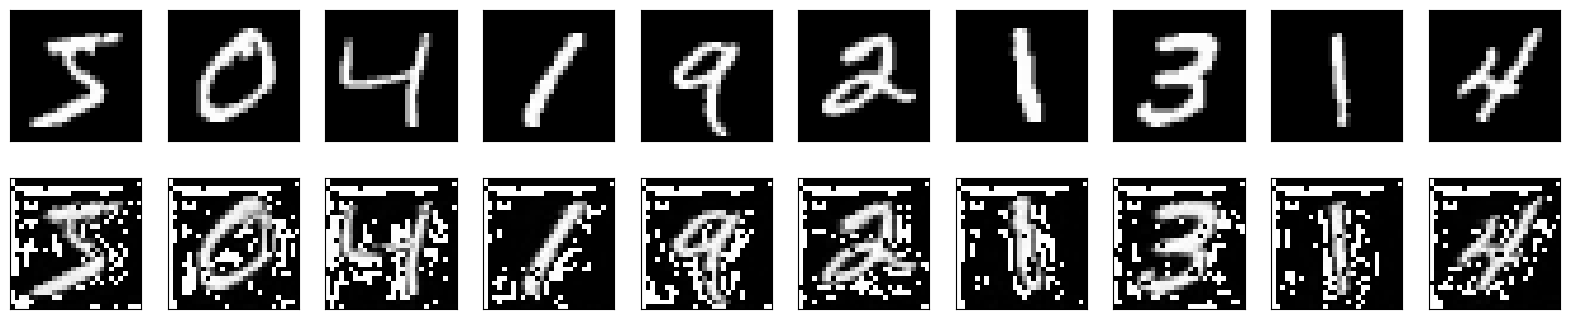

In [12]:
import matplotlib.pyplot as plt
# Generate images
n = 10 # Number of images to display
generated_images = model.predict(x_train[:n])
# Reshape and re-scale the images
generated_images = generated_images.reshape((n, 28, 28))
generated_images = (generated_images * 255).astype(np.uint8)
# Plot the images
plt.figure(figsize=(20, 4))
for i in range(n):
  # Display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_train[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # Display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(generated_images[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

####Adding more layers to a neural network can have both positive and negative effects on image generation. Therefore, it's important to monitor the model's performance on a validation set during training to ensure that it's not overfitting.


###Positive Effects:

#####Increased Capacity:
Adding more layers increases the model's capacity to learn complex patterns in the data, which can be beneficial for capturing intricate features.
#####Expressiveness:
Deeper networks can capture hierarchical representations, potentially improving the model's ability to generate more detailed and realistic images.
###Negative Effects:

#####Overfitting:
Increasing the number of layers may lead to overfitting, especially if the dataset is not large enough. The model might start memorizing the training data instead of generalizing well to unseen data.
#####Training Time:
Deeper networks often require more training time and computational resources.